In [21]:
import numpy as np
import os
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data_dir = '/home/owaismujtaba/projects/NeuroLab/Results/TrainedModels'

In [3]:
results = {}
for subject in range(1, 31):
    if subject< 10:
        subject = f'0{subject}'
    sub_dir = Path(data_dir, str(subject))
    model_dir = Path(sub_dir, 'LR')
    files = os.listdir(model_dir)

    pcc_values = []
    for file in files:
        file_dir = Path(model_dir, file)
        file_data = np.load(file_dir)
        pcc_values.append(float(file_data[-1]))
    results[subject] = pcc_values
    
    

In [4]:
results2 = {}
for subject in range(1, 31):
    if subject< 10:
        subject = f'0{subject}'
    sub_dir = Path(data_dir, str(subject))
    model_dir = Path(sub_dir, 'NeuralNetwork_R_1')
    files = os.listdir(model_dir)

    pcc_values = []
    for file in files:
        file_dir = Path(model_dir, file)
        file_data = np.load(file_dir)
        pcc_values.append(float(file_data[-1]))
    results2[subject] = pcc_values

In [5]:
results2['01']

[0.6128063611040725,
 0.6918223062526592,
 0.7201621005652888,
 0.7112258072228811,
 0.7221162603257977]

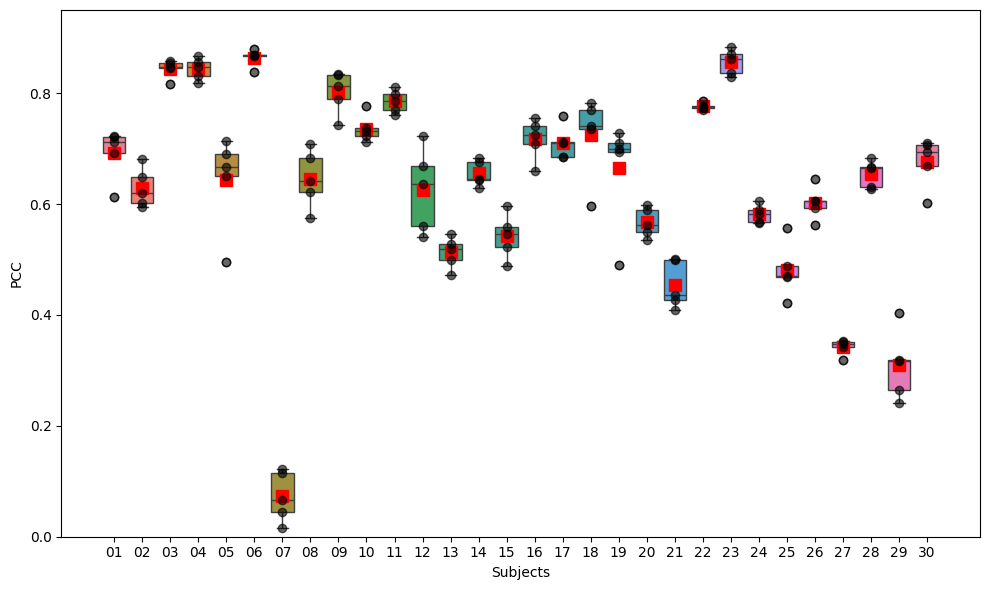

In [6]:
data =results2
subjects = list(data.keys())
values = list(data.values())

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=values, zorder=1)

# Add the mean as a square marker
for i, subject_values in enumerate(values):
    mean_value = np.mean(subject_values)
    plt.plot(i, mean_value, marker='s', color='red', markersize=8, label='Mean' if i == 0 else "")

# Add individual data points on top of the box plot
for i, subject_values in enumerate(values):
    plt.scatter([i] * len(subject_values), subject_values, color='black', alpha=0.6, zorder=2, label='Data points' if i == 0 else "")

# Customize the plot
plt.xticks(ticks=np.arange(len(subjects)), labels=subjects)
plt.xlabel("Subjects")
plt.ylabel("PCC")
plt.ylim([0, 0.95])
plt.tight_layout()
plt.savefig('Images/NN_pcc.png', dpi=600)

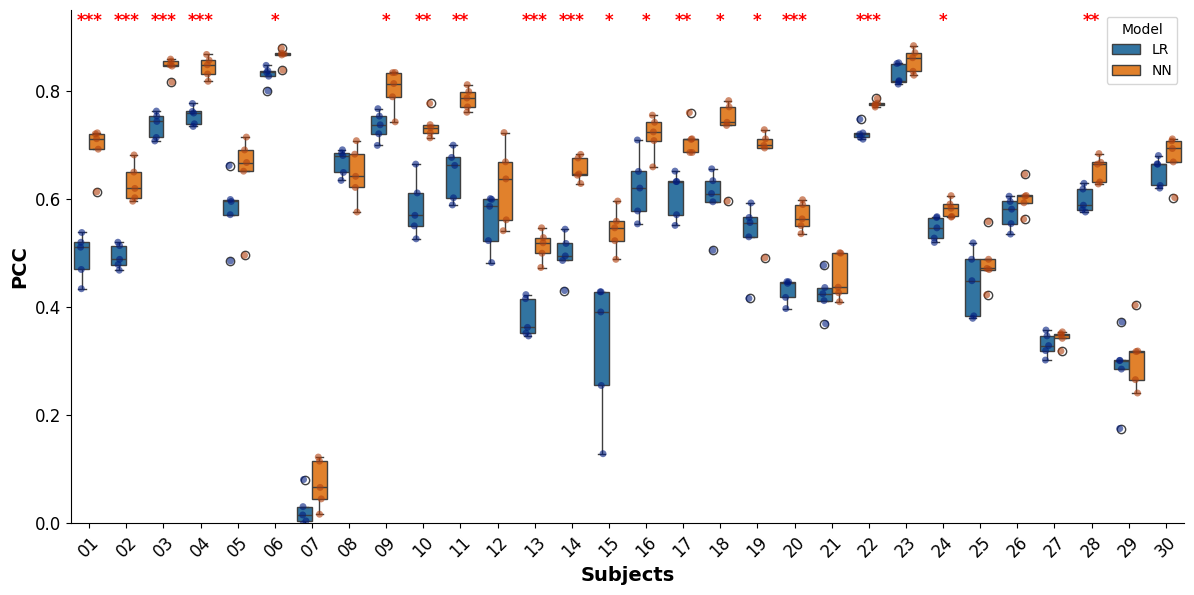

In [41]:
from scipy.stats import ttest_ind
data1 = results  # First dataset
data2 = results2  # Second dataset

subjects = list(data1.keys())

significance = []

# Convert to long format DataFrame
df1 = pd.DataFrame({"Subject": np.repeat(subjects, [len(data1[s]) for s in subjects]), 
                    "PCC": np.concatenate(list(data1.values())), 
                    "Condition": "LR"})

df2 = pd.DataFrame({"Subject": np.repeat(subjects, [len(data2[s]) for s in subjects]), 
                    "PCC": np.concatenate(list(data2.values())), 
                    "Condition": "NN"})

df = pd.concat([df1, df2], ignore_index=True)

# Compute p-values for each subject
p_values = {}
for subject in subjects:
    p_val = ttest_ind(data1[subject], data2[subject], equal_var=False).pvalue  # Unpaired t-test
    p_values[subject] = p_val

# Significance levels
def significance_marker(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return 'ns'  # Not significant

# Create a box plot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x="Subject", y="PCC", hue="Condition", data=df, zorder=1)

# Overlay individual data points
sns.stripplot(x="Subject", y="PCC", hue="Condition", data=df, 
              dodge=True, jitter=True, marker='o', alpha=0.6, palette="dark", zorder=2)

# Annotate with p-values
x_positions = np.arange(len(subjects))
for i, subject in enumerate(subjects):
    p_val = p_values[subject]
    marker = significance_marker(p_val)
    if marker != 'ns':
        significance.append([subject, np.mean(data1[subject]), np.mean(data2[subject]), p_val])
        # Place text annotation
        ax.text(i, 0.92, marker, ha='center', fontsize=12, fontweight='bold', color='red')

# Customize plot
plt.xlabel("Subjects", fontsize=14, fontweight='bold')
plt.ylabel("PCC", fontsize=14, fontweight='bold')
plt.ylim([0, 0.95])
plt.xticks(rotation=45)
plt.legend(title="Model")
plt.tight_layout()
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Model")
plt.xticks(rotation=45, fontsize=12)  # Increase font size to 14 (or another preferred size)
plt.yticks(fontsize=12)

plt.savefig('Images/pcc_final.png', dpi=800)
plt.show()


In [23]:
data = pd.DataFrame(significance, columns=['sub', 'LR', 'NN', 'p'])
data.to_csv('Images/significance.csv')
data

,sub,LR,NN,p
0,01,0.494061,0.691627,0.000104
1,02,0.493403,0.629459,0.000210
2,03,0.735874,0.844463,0.000073
3,04,0.753915,0.844016,0.000068
4,06,0.828917,0.864136,0.010665
5,09,0.735210,0.802374,0.014322
6,10,0.584051,0.736087,0.001664
7,11,0.645625,0.785324,0.001423
8,13,0.379454,0.513035,0.000254
9,14,0.494269,0.655139,0.000264


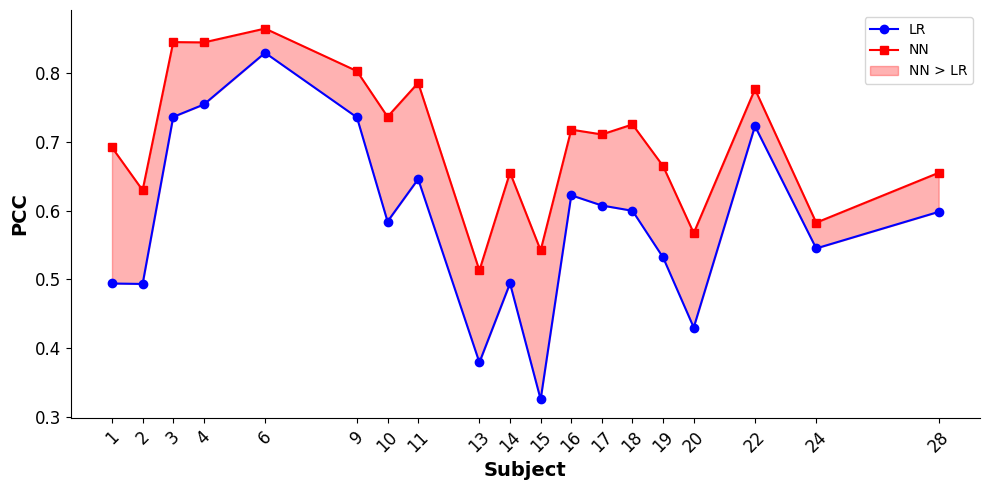

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Data
sub = [1, 2, 3, 4, 6, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 28]
LR = [0.494061, 0.493403, 0.735874, 0.753915, 0.828917, 0.735210, 0.584051, 0.645625, 
      0.379454, 0.494269, 0.325787, 0.622102, 0.607276, 0.599586, 0.531801, 0.430181, 
      0.722522, 0.544999, 0.598049]
NN = [0.691627, 0.629459, 0.844463, 0.844016, 0.864136, 0.802374, 0.736087, 0.785324, 
      0.513035, 0.655139, 0.542202, 0.717402, 0.710419, 0.724950, 0.664449, 0.567244, 
      0.776153, 0.582392, 0.654757]

# Compute differences
diff = np.array(NN) - np.array(LR)

# Plot
plt.figure(figsize=(10, 5))

plt.plot(sub, LR, marker='o', linestyle='-', label='LR', color='blue')
plt.plot(sub, NN, marker='s', linestyle='-', label='NN', color='red')

plt.fill_between(sub, LR, NN, where=np.array(NN) > np.array(LR), interpolate=True, color='red', alpha=0.3, label='NN > LR')
#plt.fill_between(sub, LR, NN, where=np.array(NN) < np.array(LR), interpolate=True, color='blue', alpha=0.3, label='LR > NN')

plt.xlabel('Subject', fontsize=14, fontweight='bold')
plt.ylabel('PCC', fontsize=14, fontweight='bold')
#plt.title('Comparison of LR and NN')
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(sub, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.legend()
#plt.grid(True)
plt.savefig('Images/difference.png', dpi=600)
plt.show()


In [4]:
seeg = np.load('Data\P01_sEEG.npy')
seeg.shape

(307511, 130)

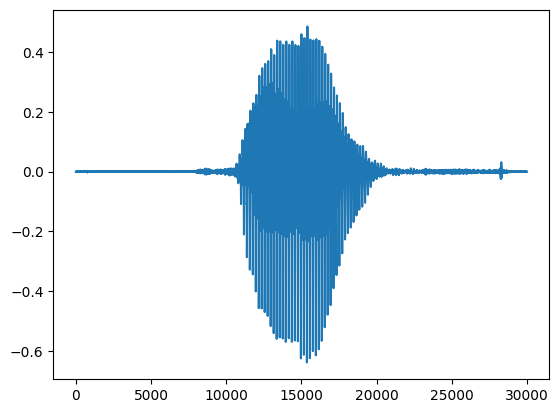

In [ ]:
plt.plot(audio[30000:60000])


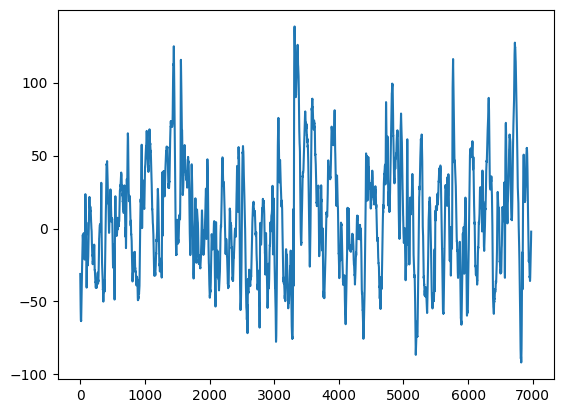

In [16]:
sample = seeg[1024:8000]
sample = np.mean(sample, axis=1)
sample.shape
plt.plot(sample)

In [9]:
seeg.shape

(307511, 130)